# Loan Application Status Prediction
#### Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve,auc

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Uploading dataset

In [2]:
df = pd.read_csv("loan_status")
# Reading 5 rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#### Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

#### Dependent Variable (Target Variable):

- Loan_Status

In [4]:
print("Number of Rows {} and number of columns {}".format(len(df),len(df.shape)))

Number of Rows 614 and number of columns 2


In [5]:
ctype = df.dtypes.reset_index()
ctype.columns=['Counts','Columns Type']
ctype.groupby("Columns Type").aggregate("count").reset_index()

,Columns Type,Counts
0,int64,1
1,float64,4
2,object,8


In [6]:
# Checking full information of our dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# Let's check the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

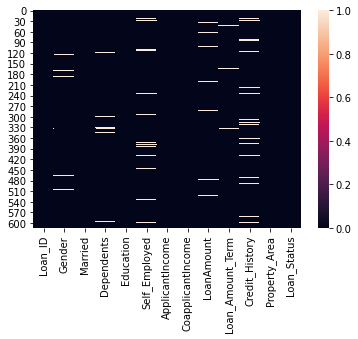

In [8]:
# Checking null values using graph
sns.heatmap(df.isnull())

In [9]:
# Missing values percentage
print("missing percentage of Gender --"+str(round(df['Gender'].isnull().sum()/len(df)*100,2)) + "%")

print("missing percentage of Married --"+str(round(df['Married'].isnull().sum()/len(df)*100,2)) + "%")

print("missing percentage of Dependents --"+str(round(df['Dependents'].isnull().sum()/len(df)*100,2)) + "%")

print("missing percentage of Self_Employed --"+str(round(df['Self_Employed'].isnull().sum()/len(df)*100,2)) + "%")

print("missing percentage of LoanAmount --"+str(round(df['LoanAmount'].isnull().sum()/len(df)*100,2)) + "%")

print("missing percentage of Loan_Amount_Term --"+str(round(df['Loan_Amount_Term'].isnull().sum()/len(df)*100,2)) + "%")

print("missing percentage of Credit_History --"+str(round(df['Credit_History'].isnull().sum()/len(df)*100,2)) + "%")

missing percentage of Gender --2.12%
missing percentage of Married --0.49%
missing percentage of Dependents --2.44%
missing percentage of Self_Employed --5.21%
missing percentage of LoanAmount --3.58%
missing percentage of Loan_Amount_Term --2.28%
missing percentage of Credit_History --8.14%


In [10]:
# Now checking  features description.
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### Key Observations :-
1. Applicateincome show that there is high difference in mean and median of columns and also there is high standard deviation.Mean is very high than median which means high skewness is also present and also there is a lot of differnce in 75th percentile and 100th percentile.
2. Same Coapplicantincome is also having a lot of diffenence.


In [11]:
# Dropping Loan id as this is not giving any information.
df.drop(['Loan_ID'],axis=1,inplace=True)

In [12]:
for i in df.columns:
    if df[i].dtypes=='object':
        print(df[i].value_counts())
        print("\n")

Male      489
Female    112
Name: Gender, dtype: int64


Yes    398
No     213
Name: Married, dtype: int64


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     500
Yes     82
Name: Self_Employed, dtype: int64


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


Y    422
N    192
Name: Loan_Status, dtype: int64




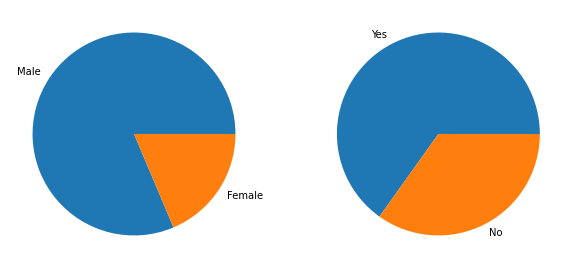

In [13]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.pie(x=df['Gender'].value_counts(),labels=df['Gender'].value_counts().index)

plt.subplot(1,2,2)
plt.pie(x=df['Married'].value_counts(),labels=df['Married'].value_counts().index)
plt.show()


High difference in male and female percentage while in married and non-married there is less differnce but married percentage is high.

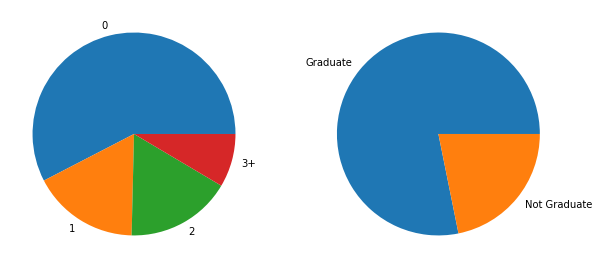

In [14]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.pie(x=df['Dependents'].value_counts(),labels=df['Dependents'].value_counts().index)

plt.subplot(1,2,2)
plt.pie(x=df['Education'].value_counts(),labels=df['Education'].value_counts().index)
plt.show()

Educated people are in greater number than under-graduated.

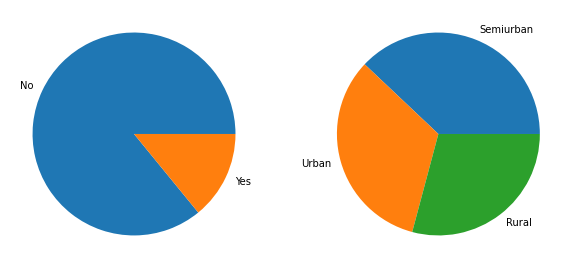

In [15]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.pie(x=df['Self_Employed'].value_counts(),labels=df['Self_Employed'].value_counts().index)

plt.subplot(1,2,2)
plt.pie(x=df['Property_Area'].value_counts(),labels=df['Property_Area'].value_counts().index)
plt.show()
plt.show()

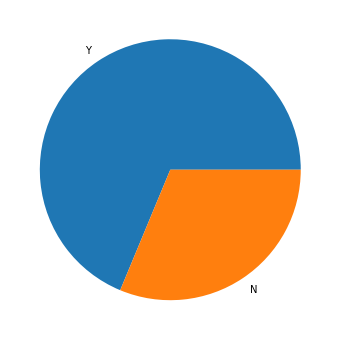

In [16]:
plt.figure(figsize=(10,6))
plt.pie(x=df['Loan_Status'].value_counts(),labels=df['Loan_Status'].value_counts().index)
plt.show()

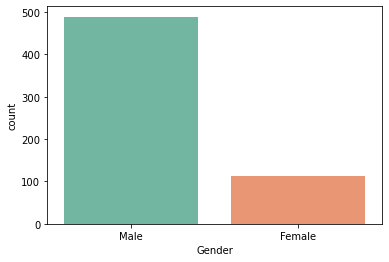

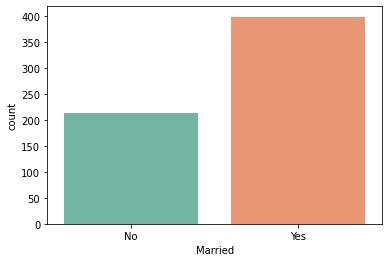

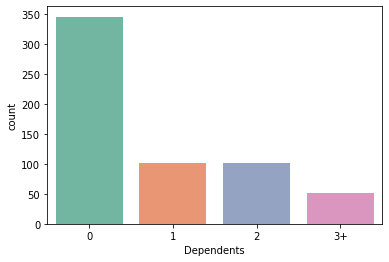

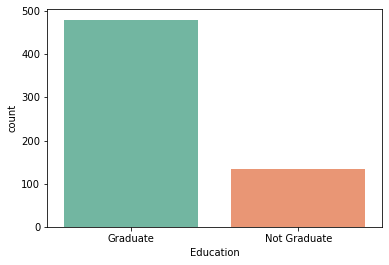

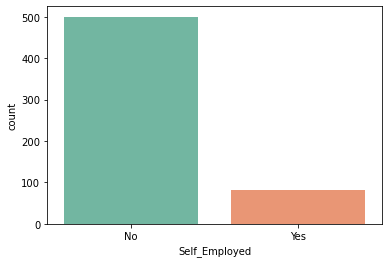

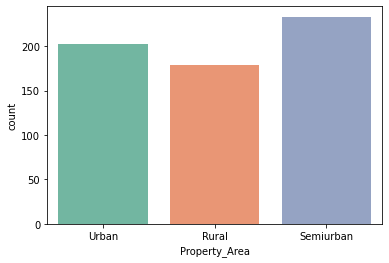

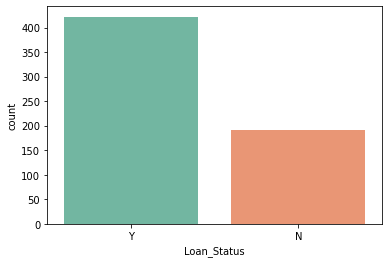

In [17]:
for i in df.columns:
    if df[i].dtypes=="object":
        plt.subplots()
        sns.countplot(df[i],palette='Set2')

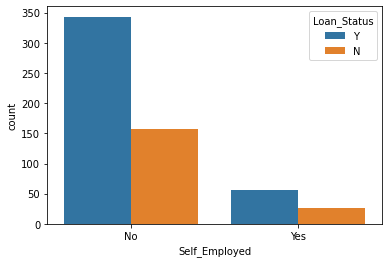

In [18]:
sns.countplot(x='Self_Employed',data=df,hue='Loan_Status')

In [19]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

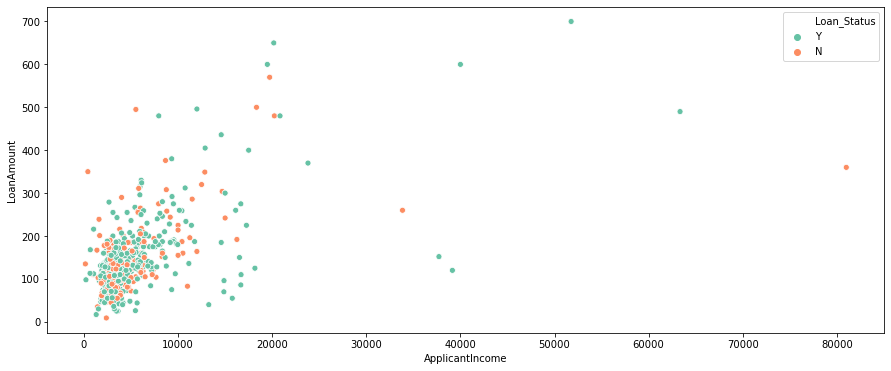

In [20]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['ApplicantIncome'],y=df['LoanAmount'],hue=df['Loan_Status'],data=df,palette='Set2')

##### As we can see that applicants with less income are in need of loans than with higher income ,but higher income applicants aslo need higher amount of loan which is relatable  while some outliers are aslo present .

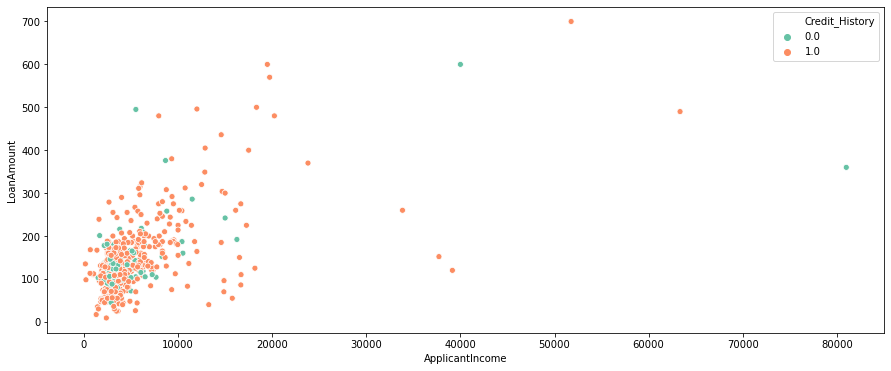

In [21]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['ApplicantIncome'],y=df['LoanAmount'],hue=df['Credit_History'],data=df,palette='Set2')

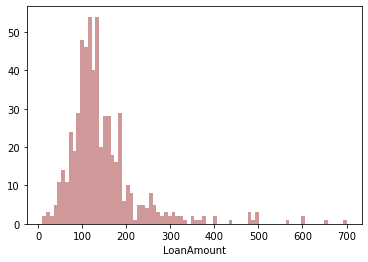

In [22]:
sns.distplot(df['LoanAmount'].dropna(),kde=False,color='darkred',bins=80)

##### Loan amount is not normally distributed. It shows that there is high number of loans in low range while a few are high amount loans.

In [23]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

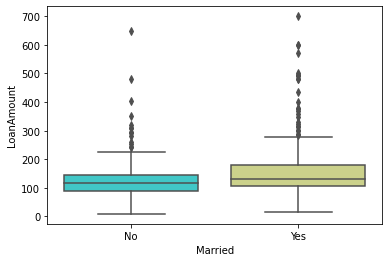

In [24]:
sns.boxplot(x=df['Married'],y=df['LoanAmount'],data=df,palette='rainbow')

In [25]:
df.groupby('Self_Employed').aggregate('count')

,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Self_Employed,,,,,,,,,,,
No,491,497,487,500,500,500,482,489,463,500,500
Yes,78,82,80,82,82,82,79,80,75,82,82


In [26]:
pd.crosstab(index=df.Gender,columns=df.Education)

Education,Graduate,Not Graduate
Gender,,
Female,92,20
Male,376,113


In [27]:
pd.crosstab(index=df.Credit_History,columns=df.Self_Employed)

Self_Employed,No,Yes
Credit_History,,
0.0,76,12
1.0,387,63


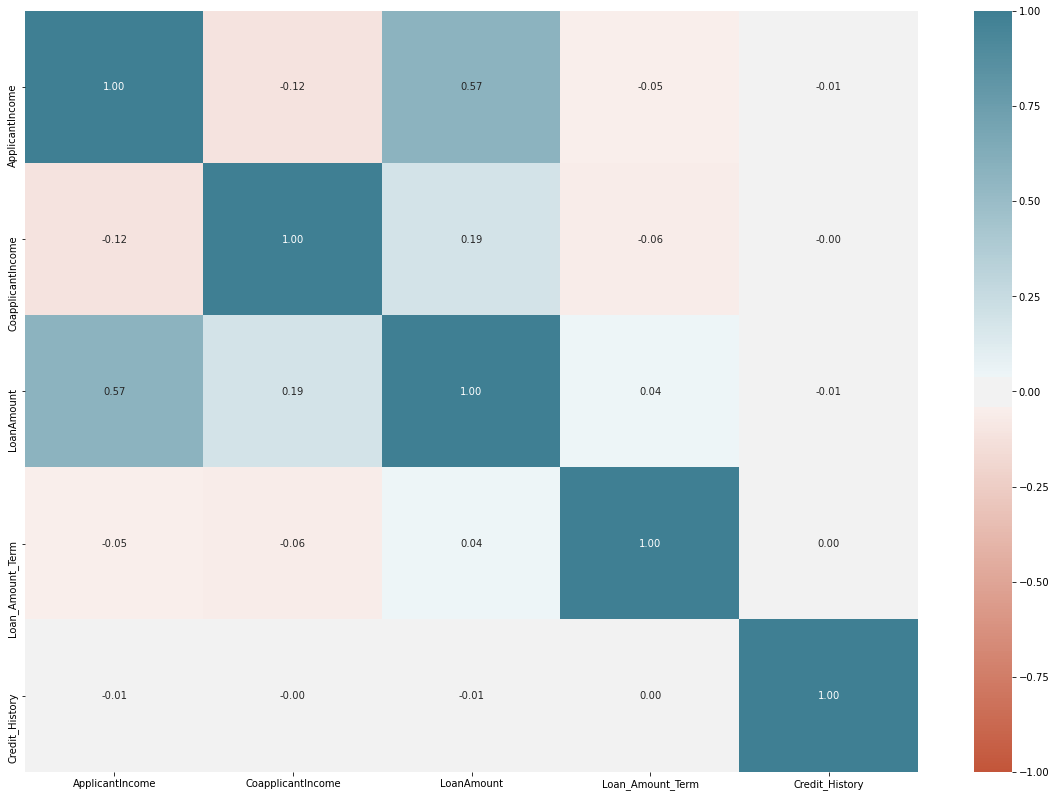

In [28]:
plt.figure(figsize=(20,14))
sns.heatmap(df.corr(),annot=True,fmt='.2f',vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

##### Applicantincome is having corelation with LoanAmount. It suggest that those with higher income needs higher amount of loan. 
##### All other numerical columns are not having any correlation with each other.

In [29]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [30]:
# filling null values in numerical variables
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(),inplace=True)

In [31]:
# filling null values in categorical variables
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [32]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

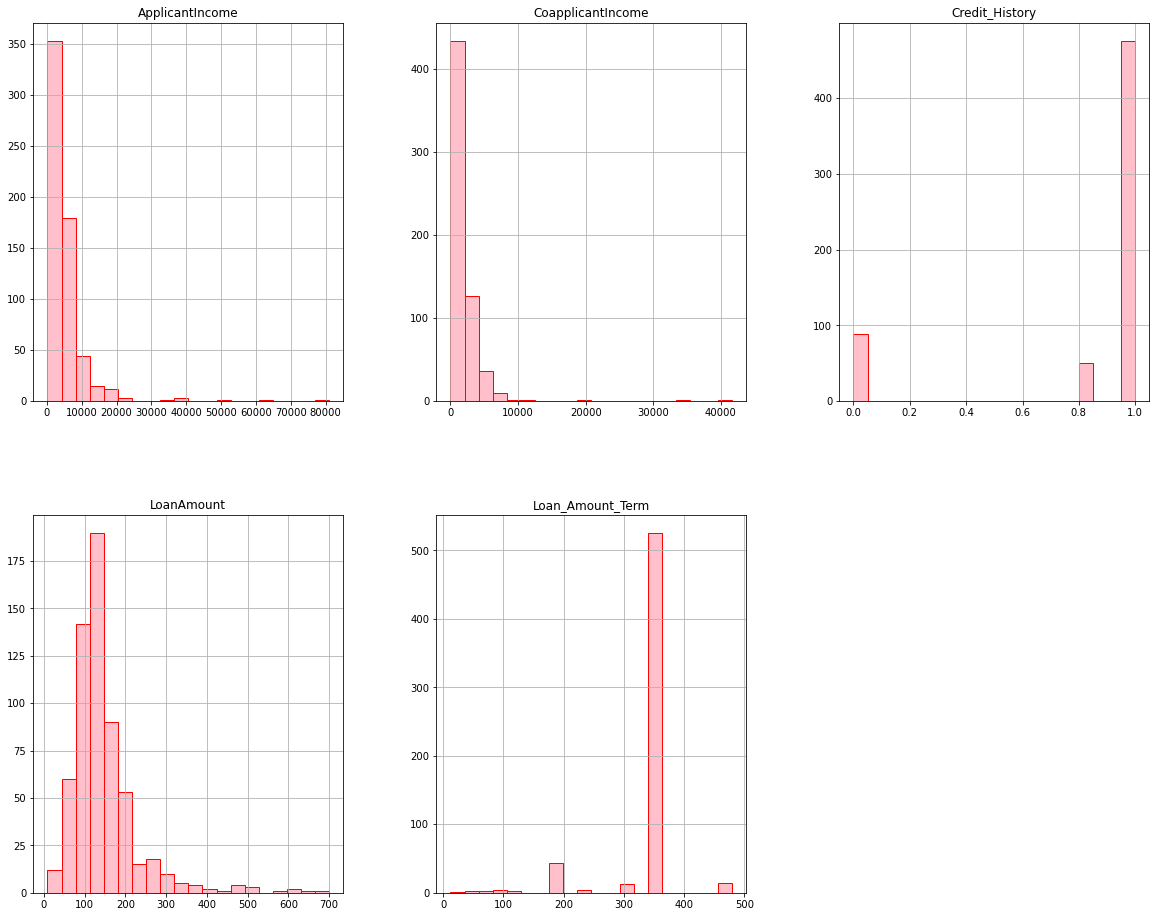

In [33]:
df.hist(bins=20,facecolor='pink',edgecolor='red',grid=True,figsize=(20,16),layout=(2,3))
plt.show()

##### Skewness is present in all columns.

In [34]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [35]:
# Removing skewness
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True)
for i in df.columns:
    if df[i].dtypes !='object':
        df[[i]]=pt.fit_transform(df[[i]])

In [36]:
df.skew()

ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.024376
Loan_Amount_Term     0.389827
Credit_History      -1.599912
dtype: float64

In [37]:
# Labeling the data
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=encoder.fit_transform(df[i])
    

In [38]:
# To see the values of encoding-
for key,value in enumerate(encoder.classes_):
    print(key,'=',value)                                

0 = N
1 = Y


In [39]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.544331,-1.102837,0.235387,0.185905,0.514063,2,1
1,1,1,1,0,0,0.170974,0.750578,-0.037659,0.185905,0.514063,0,0
2,1,1,0,0,1,-0.499955,-1.102837,-1.346305,0.185905,0.514063,2,1
3,1,1,0,1,0,-0.743873,0.891686,-0.167886,0.185905,0.514063,2,1
4,1,0,0,0,0,0.582817,-1.102837,0.158610,0.185905,0.514063,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,-0.554885,-1.102837,-1.205100,0.185905,0.514063,0,1
610,1,1,3,0,0,-0.000290,-1.102837,-2.293317,-2.308570,0.514063,0,1
611,1,1,1,0,0,1.023487,0.208603,1.372409,0.185905,0.514063,2,1
612,1,1,2,0,0,0.931750,-1.102837,0.738924,0.185905,0.514063,2,1


### Splitting training and testing data

In [40]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [41]:
print("x dimension -{} \ny dimension -{}".format(x.shape,y.shape))

x dimension -(614, 11) 
y dimension -(614,)


In [42]:
features=x.columns

In [43]:
# Now  doing scaling 
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X=scale.fit_transform(x)


In [44]:
x=pd.DataFrame(X,columns=features)
x.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.544331,-1.102837,0.235387,0.185905,0.514063,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.170974,0.750578,-0.037659,0.185905,0.514063,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.499955,-1.102837,-1.346305,0.185905,0.514063,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.743873,0.891686,-0.167886,0.185905,0.514063,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.582817,-1.102837,0.158610,0.185905,0.514063,1.223298


### Splitting trainig and testing data

In [45]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.22,random_state=0)

In [46]:
from sklearn.svm import SVC
model=SVC(kernel='linear',C=1)
model.fit(X_train,Y_train)
print(model.score(X_train,Y_train))
pred=model.predict(X_test)
print(accuracy_score(Y_test,pred))
print(confusion_matrix(Y_test,pred))

0.7656903765690377
0.7867647058823529
[[18 20]
 [ 9 89]]


In [47]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,x,y,cv=6)
print(score.mean())
print(score.std())

0.7703217209213782
0.034007944599438455


In [48]:
def model(m):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.22,random_state=0)
    m.fit(X_train,Y_train)
    sco=m.score(X_train,Y_train)
    score.append((sco*100))
    # Predicting
    pred=m.predict(X_test)
    # Accuracy
    print(accuracy_score(Y_test,pred))
    acc.append(accuracy_score(Y_test,pred)*100)
    # confusion matrix
    print(confusion_matrix(Y_test,pred))
    # Classification matrix
    print(classification_report(Y_test,pred))
    # Roc-auc 
    fpr,tpr,thresholds=roc_curve(Y_test,pred)
    roc_auc=auc(fpr,tpr)
    print(roc_auc)
    ROC_AUC.append(roc_auc*100)
    sc=cross_val_score(m,x,y,cv=6,scoring="accuracy")
    print(sc.mean())
    cv_score.append(sc.mean())
    print(sc.std())
    print(sc)

In [49]:

score=[],
acc=[],
ROC_AUC=[],
cv_score=[]

In [50]:
KNN=KNeighborsClassifier(n_neighbors=11)
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=0)
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=100,random_state=0)
GBC=GradientBoostingClassifier(n_estimators=250)
ABC=AdaBoostClassifier(n_estimators=50)
BC=BaggingClassifier(n_estimators=250)

In [51]:
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))
models.append(('RandomForestClassifier',RFC))
models.append(('GradientBoostingClassifier',GBC))
models.append(('AdaBoostClassifier',ABC))
models.append(('BaggingClassifier',BC))

In [52]:
Model=[]
score=[]
acc=[]
cv_score=[]
roc_score=[]
for name,model in models:
    print("~~~~~~~~******~~~~~~~~~~~",name,"~~~~~~~~~~******~~~~~~~~~~~~")
    
    Model.append(name)
    print("\n")
    model.fit(X_train,Y_train)
    print(model)
    sc=model.score(X_train,Y_train)
    print("Training score is -> ",sc*100)
    score.append(sc*100)
    pred=model.predict(X_test)
    acc_score=accuracy_score(Y_test,pred)
    print("Accuracy is -> ",acc_score*100)
    acc.append(acc*100)
    soc=cross_val_score(model,x,y,cv=6,scoring='accuracy').mean()
    print("Cross validation score -> ",soc*100)
    cv_score.append(soc)
    print(confusion_matrix(Y_test,pred))
    print(classification_report(Y_test,pred))
   
    fpr,tpr,threshold=roc_curve(Y_test,pred)
    roc_auc=auc(fpr,tpr)
    print("ROC_AUC score -> ,",roc_auc*100)
    roc_score.append(roc_auc*100)
    print()

~~~~~~~~******~~~~~~~~~~~ KNeighborsClassifier ~~~~~~~~~~******~~~~~~~~~~~~


KNeighborsClassifier(n_neighbors=11)
Training score is ->  80.3347280334728
Accuracy is ->  82.35294117647058
Cross validation score ->  79.64020559680182
[[15 23]
 [ 1 97]]
              precision    recall  f1-score   support

           0       0.94      0.39      0.56        38
           1       0.81      0.99      0.89        98

    accuracy                           0.82       136
   macro avg       0.87      0.69      0.72       136
weighted avg       0.84      0.82      0.80       136

ROC_AUC score -> , 69.2266380236305

~~~~~~~~******~~~~~~~~~~~ SVC ~~~~~~~~~~******~~~~~~~~~~~~


SVC()
Training score is ->  83.05439330543933
Accuracy is ->  81.61764705882352
Cross validation score ->  79.15476870359794
[[16 22]
 [ 3 95]]
              precision    recall  f1-score   support

           0       0.84      0.42      0.56        38
           1       0.81      0.97      0.88        98

    accuracy   

result = pd.DataFrame({'Model':Model,'Score':score,'Accuracy_score':acc,'cross_val_score':cv_score,'Roc_auc_curve':roc_score})
result

##### So we find that Support Vector Machine model is giving better results than others comparing all the  scoing.so we are using svc for our model .

In [53]:
# Using GridSearchC for hyperparameter tunning
from sklearn.model_selection import GridSearchCV
c_values = [0.1,0.3,0.5,0.7,0.9,1.0,1.3,1.5,1.7,2.0]
kernel_values = ['linear','ploy','rbf','sigmoid']
gamma_s=['scale','auto']
param_grid = dict(C=c_values,kernel=kernel_values,gamma=gamma_s)

gridsearch = GridSearchCV(SV, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

In [54]:
gridsearch.fit(X_train,Y_train)
print(gridsearch.best_params_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s


{'C': 1.3, 'gamma': 'scale', 'kernel': 'rbf'}


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    5.1s finished


In [55]:
svm=SVC(C= 1.3, kernel= 'rbf',gamma= 'scale')
svm.fit(X_train,Y_train)
preds=svm.predict(X_test)
print(accuracy_score(Y_test,preds))
print(confusion_matrix(Y_test,preds))
print(classification_report(Y_test,preds))
print("cross validation score ->",cross_val_score(svm,x,y,cv=6).mean())


0.8161764705882353
[[16 22]
 [ 3 95]]
              precision    recall  f1-score   support

           0       0.84      0.42      0.56        38
           1       0.81      0.97      0.88        98

    accuracy                           0.82       136
   macro avg       0.83      0.70      0.72       136
weighted avg       0.82      0.82      0.79       136

cross validation score -> 0.7882955771305284


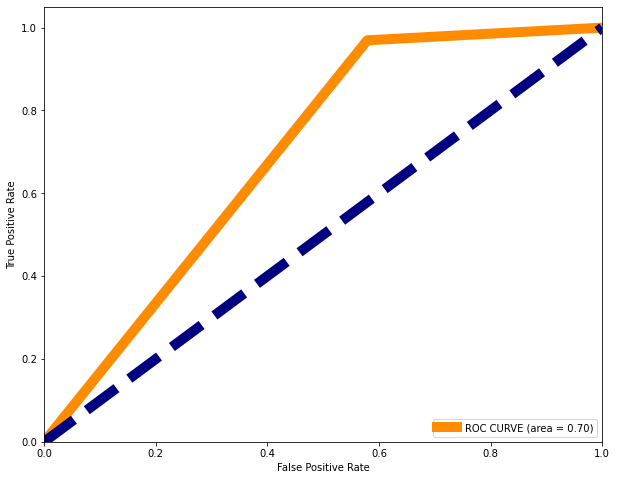

In [56]:
fpr,tpr,thresholds=roc_curve(Y_test,preds)
roc_auc =auc(fpr,tpr)

plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC CURVE (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

### Saving File

In [57]:
import joblib
filename="svc_loan.obj"
joblib.dump(svm,filename)

['svc_loan.obj']

In [58]:
# Loading model
model=joblib.load(filename)
model

SVC(C=1.3)

### Conclusion

In [59]:
conclusion=pd.DataFrame([model.predict(X_test),Y_test],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
Predicted,1,1,1,1,1,0,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
Original,1,0,1,0,1,0,1,1,0,1,...,1,1,0,1,1,1,0,0,1,1
